In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.feature_extraction.image \
    import extract_patches_2d, reconstruct_from_patches_2d

In [2]:
from skimage import color
from skimage import io

In [3]:
color_img = io.imread('datasets/koala.jpg')

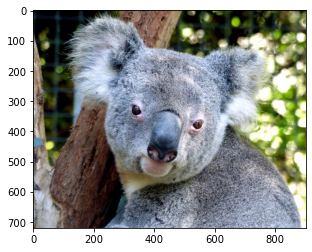

In [4]:
plt.imshow(color_img, cmap=plt.cm.gray)

plt.show()

#### Convertir a escala de grises

In [5]:
img = color.rgb2gray(color_img)

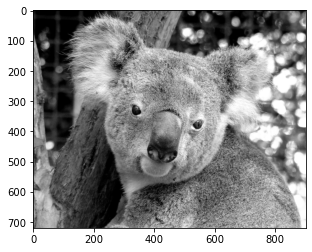

In [6]:
plt.imshow(img, cmap=plt.cm.gray)

plt.show()

In [7]:
img.shape

(720, 902)

In [8]:
height, width = img.shape

In [15]:
distorted_img = img.copy()

In [16]:
distorted_img

array([[0.23508667, 0.18607843, 0.11410627, ..., 0.12523961, 0.15800392,
        0.20645451],
       [0.26645922, 0.19587098, 0.10961137, ..., 0.11683098, 0.15351686,
        0.20477294],
       [0.25664392, 0.18802784, 0.1056898 , ..., 0.14175216, 0.17116039,
        0.20420745],
       ...,
       [0.2650498 , 0.24797961, 0.30736863, ..., 0.99438902, 0.99438902,
        0.99438902],
       [0.22191255, 0.21546824, 0.25638824, ..., 0.99438902, 0.99438902,
        0.99438902],
       [0.19446157, 0.19193882, 0.19364314, ..., 0.99438902, 0.99438902,
        0.99438902]])

In [17]:
distortion = 0.075 * np.random.randn(height, width // 2)

distortion.shape

(720, 451)

#### ver distorsión

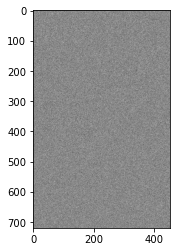

In [18]:
plt.imshow(distortion, cmap='gray')

plt.show()

#### Agregar la distorsión a la parte derecha de la imagen

In [19]:
distorted_img[:, width // 2:] += distortion

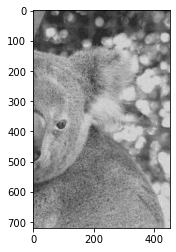

In [20]:
plt.imshow(distorted_img[:, width // 2:], cmap=plt.cm.gray)

plt.show()

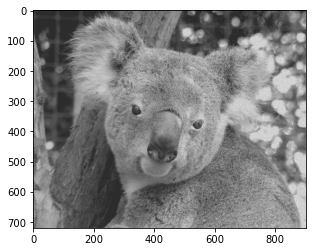

In [21]:
plt.imshow(distorted_img, cmap=plt.cm.gray)

plt.show()

#### Crear un aprendizaje de la parte izquierda no distorcionado

In [22]:
patch_size = (7, 7)

data = extract_patches_2d(distorted_img[:, :width // 2], patch_size)

In [23]:
data.shape

(317730, 7, 7)

#### Como se ve un parche

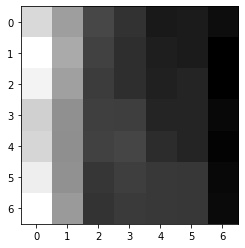

In [24]:
plt.imshow(data[0], cmap=plt.cm.gray)

plt.show()

#### Cambiar la forma de datos para tener un solo vector por parche

In [25]:
data = data.reshape(data.shape[0], -1)

In [26]:
data.shape

(317730, 49)

#### Crear un aprendizaje del diccionario de la parte izquierda

In [27]:

d_learning = MiniBatchDictionaryLearning(n_components=100,
                                        alpha=1,
                                        n_iter=1000)

components = d_learning.fit(data).components_

components

array([[ 0.16085573,  0.15897269,  0.15585696, ...,  0.13322049,
         0.11925182,  0.10809104],
       [-0.13251566, -0.1228556 , -0.10196688, ..., -0.14835196,
        -0.15541822, -0.15520013],
       [ 0.09660018,  0.12258814,  0.16148341, ...,  0.12684422,
         0.15109168,  0.15412731],
       ...,
       [ 0.19509529,  0.00228491, -0.02131932, ...,  0.12895035,
         0.16995351,  0.09724461],
       [-0.06496659,  0.1499389 ,  0.29873569, ...,  0.16838646,
         0.13284315,  0.17131192],
       [ 0.06212394,  0.26418301,  0.26215671, ...,  0.06238975,
         0.13991719,  0.10078763]])

In [28]:
components.shape

(100, 49)

#### Bucle for para visualizar los componentes

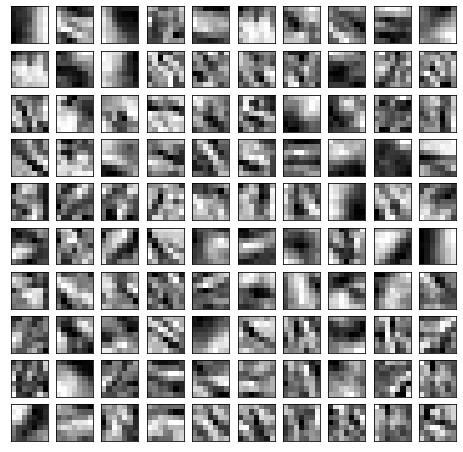

In [32]:
plt.figure(figsize=(8, 8))

for i, comp in enumerate(components):
    
    plt.subplot(10, 10, i + 1)
    
    plt.imshow(comp.reshape(patch_size),
              cmap=plt.cm.gray_r,
              interpolation='nearest')
    
    plt.xticks(())
    plt.yticks(())

plt.show()

#### Realizar eliminación de ruido 
##### Primero extraer parches 2D

In [33]:
right_data = extract_patches_2d(distored_img[:, width // 2:], patch_size)

In [34]:
right_data = right_data.reshape(right_data.shape[0], -1)

right_data.shape

(317730, 49)

#### Establecer los parametros de aprendizaje

In [35]:
d_learning.set_params(transform_n_nonzero_coefs = 1,
                     transform_algorithm = 'lars')

MiniBatchDictionaryLearning(n_components=100, transform_algorithm='lars',
                            transform_n_nonzero_coefs=1)

#### Transformar la parte derecha con ruido con lo aprendido de la izquierda

In [36]:
code = d_learning.transform(right_data)

In [37]:
print('Shape of code: ', code.shape)
print('Shape of components: ', components.shape)

Shape of code:  (317730, 100)
Shape of components:  (100, 49)


In [38]:
patches = np.dot(code, components)
patches.shape

(317730, 49)

In [39]:
patches = patches.reshape(len(right_data), *patch_size)
patches.shape

(317730, 7, 7)

In [40]:
reconstructed_img = img.copy()

In [42]:
reconstructed_img[:, width // 2:] = \
    reconstruct_from_patches_2d(patches, (height, width // 2))

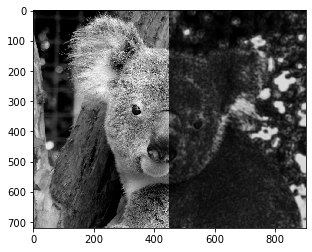

In [43]:
plt.imshow(reconstructed_img,
          vmin=0,
          vmax=1,
          cmap=plt.cm.gray,
          interpolation='nearest')

plt.show()

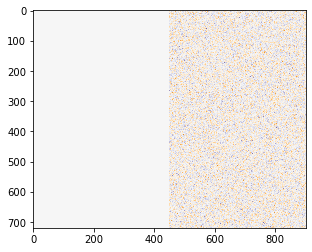

In [44]:
difference = img - distorted_img

plt.imshow(difference,
          vmin=-0.5,
          vmax=0.5,
          cmap=plt.cm.PuOr,
          interpolation='nearest')

plt.show()

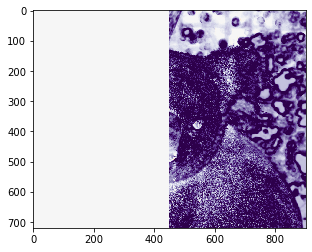

In [45]:
difference = img - reconstructed_img

plt.imshow(difference,
          vmin=-0.5,
          vmax=0.5,
          cmap=plt.cm.PuOr,
          interpolation='nearest')

plt.show()

In [47]:
d_learning.set_params(transform_n_nonzero_coefs = 1,
                     transform_algorithm = 'omp')

MiniBatchDictionaryLearning(n_components=100, transform_n_nonzero_coefs=1)

In [48]:
code = d_learning.transform(right_data)

In [49]:
print('Shape of code: ', code.shape)
print('Shape of components: ', components.shape)

Shape of code:  (317730, 100)
Shape of components:  (100, 49)


In [50]:
patches = np.dot(code, components)
patches.shape

(317730, 49)

In [51]:
patches = patches.reshape(len(right_data), *patch_size)
patches.shape

(317730, 7, 7)

In [52]:
reconstructed_img = img.copy()

In [54]:
reconstructed_img[:, width // 2:] = \
    reconstruct_from_patches_2d(patches, (height, width // 2))

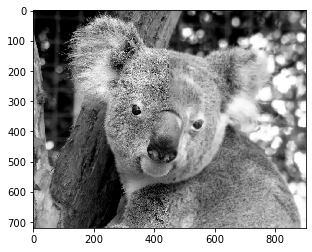

In [55]:
plt.imshow(reconstructed_img,
          vmin=0,
          vmax=1,
          cmap=plt.cm.gray,
          interpolation='nearest')

plt.show()

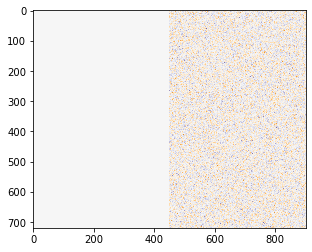

In [56]:
difference = img - distorted_img

plt.imshow(difference,
          vmin=-0.5,
          vmax=0.5,
          cmap=plt.cm.PuOr,
          interpolation='nearest')

plt.show()

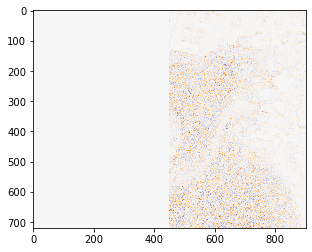

In [57]:
difference = img - reconstructed_img

plt.imshow(difference,
          vmin=-0.5,
          vmax=0.5,
          cmap=plt.cm.PuOr,
          interpolation='nearest')

plt.show()